In [12]:
import sys
print(sys.executable)


c:\Users\SRIJA\AppData\Local\Programs\Python\Python312\python.exe


In [13]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Netflix dataset
data = pd.read_csv("netflix_titles.csv")

# Step 3: Display basic information
print("✅ Dataset Loaded Successfully!\n")

print("First 5 rows:")
display(data.head())

print("\nShape of dataset:", data.shape)
print("\nColumn names:\n", data.columns)
print("\nData types:\n")
print(data.dtypes)

print("\nMissing values in each column:")
print(data.isnull().sum())


✅ Dataset Loaded Successfully!

First 5 rows:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...



Shape of dataset: (8807, 12)

Column names:
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Data types:

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Missing values in each column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [14]:
# Step 2: Data Cleaning

# 1️⃣ Check for missing values
print("Missing values before cleaning:\n")
print(data.isnull().sum())

# 2️⃣ Fill or remove missing values
# For simplicity, let's fill missing values with "Unknown"
data.fillna("Unknown", inplace=True)

# 3️⃣ Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Remove duplicates if any
data.drop_duplicates(inplace=True)

# 4️⃣ Convert 'date_added' to datetime type for better analysis
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# 5️⃣ Verify cleaning
print("\n✅ Data cleaning done successfully!\n")
print("Missing values after cleaning:\n")
print(data.isnull().sum())

# Display a sample of the cleaned dataset
display(data.head())


Missing values before cleaning:

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Number of duplicate rows: 0

✅ Data cleaning done successfully!

Missing values after cleaning:

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


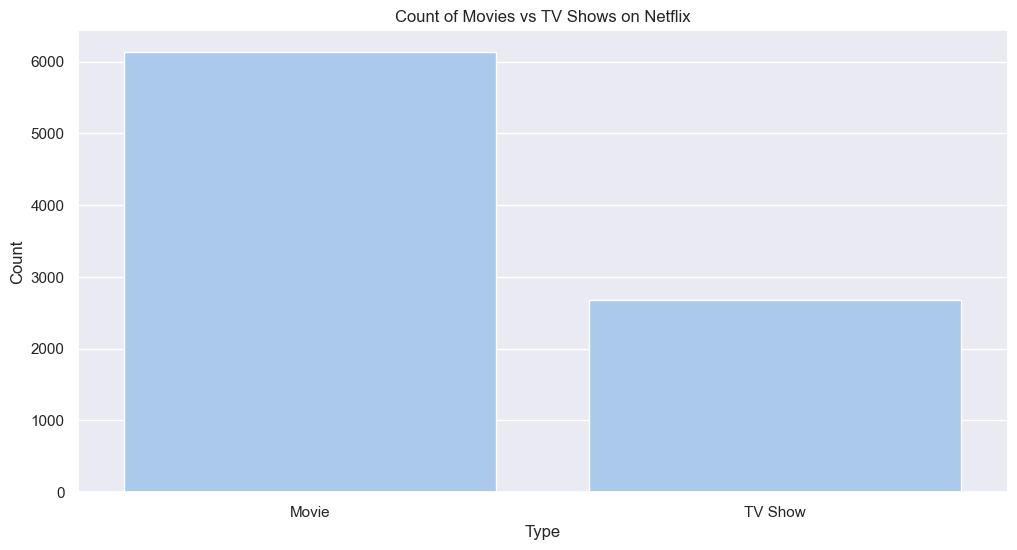

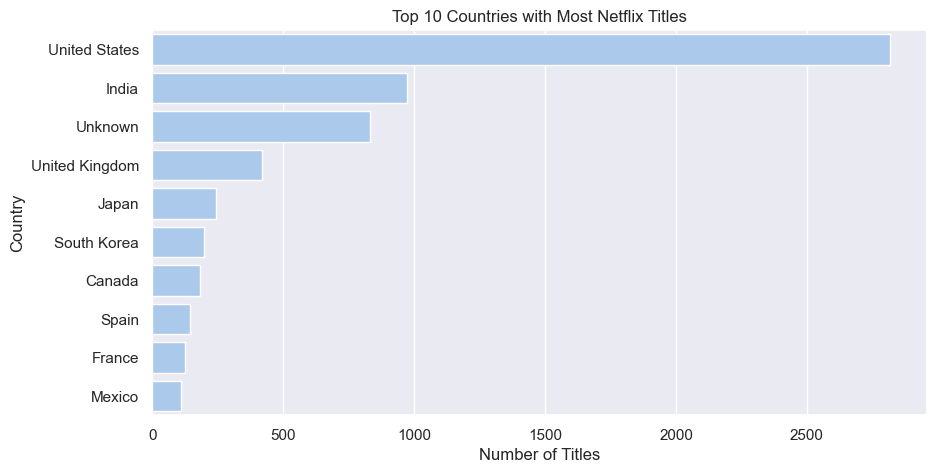

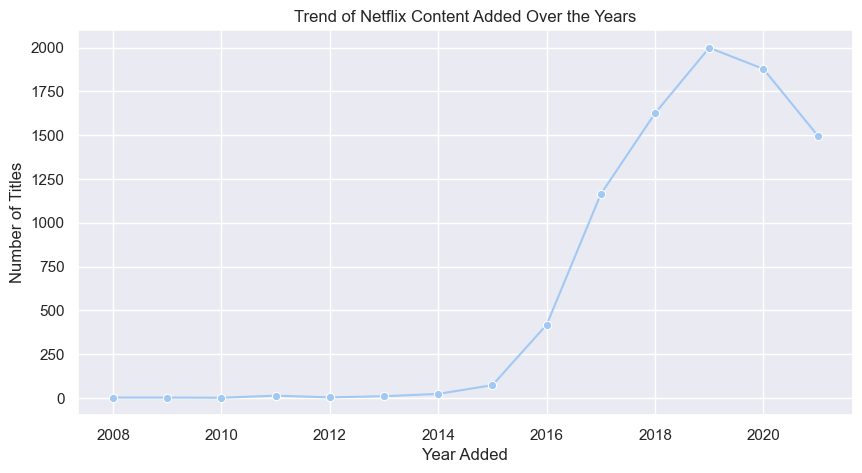

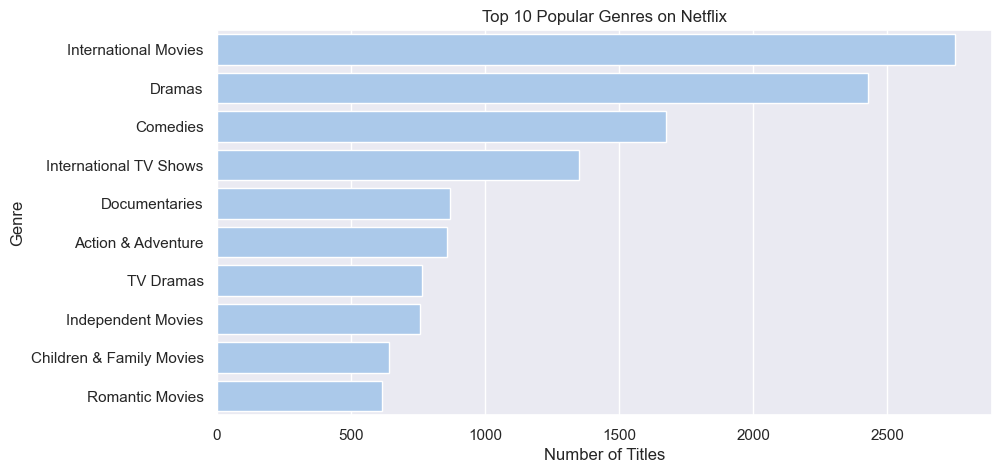

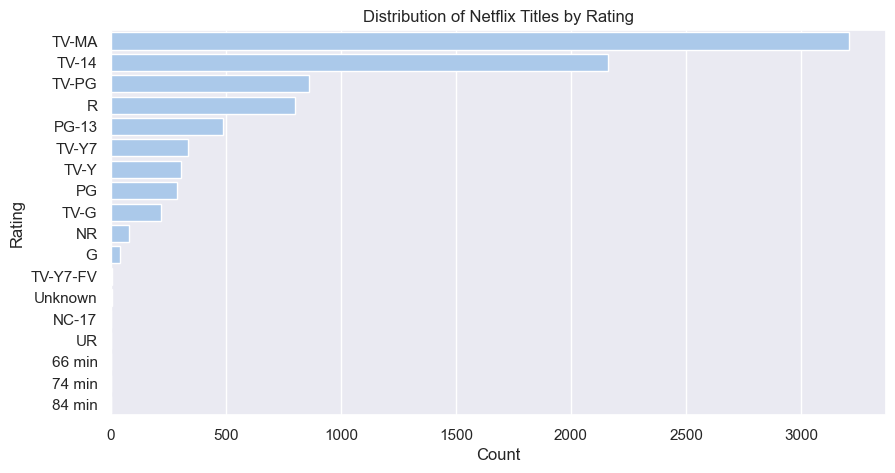

In [15]:
# Step 3: Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# Set a beautiful style for our plots
sns.set(style="darkgrid", palette="pastel")

# 1️⃣ Count of Movies vs TV Shows
plt.figure(figsize=(12,6))
sns.countplot(x='type', data=data)
plt.title("Count of Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

# 2️⃣ Top 10 Countries with Most Titles
plt.figure(figsize=(10,5))
top_countries = data['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

# 3️⃣ Trend of Content Added Over the Years
plt.figure(figsize=(10,5))
data['year_added'] = data['date_added'].dt.year
yearly_content = data['year_added'].value_counts().sort_index()
sns.lineplot(x=yearly_content.index, y=yearly_content.values, marker='o')
plt.title("Trend of Netflix Content Added Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()

# 4️⃣ Top 10 Genres
plt.figure(figsize=(10,5))
all_genres = data['listed_in'].str.split(',').explode().str.strip()
top_genres = all_genres.value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Popular Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

# 5️⃣ Movies and TV Shows Distribution by Rating
plt.figure(figsize=(10,5))
sns.countplot(y='rating', data=data, order=data['rating'].value_counts().index)
plt.title("Distribution of Netflix Titles by Rating")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()
